Perform K-Means,Hierarchical and DBSCAN Clustering for the airlines data to obtain optimum number of clusters. 
Also Visualise the results.

Data Description:
 
The file EastWest.csv data contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not.



In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("EastWest .csv")

In [46]:
df.head(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


In [47]:
df.drop('ID#',axis = 1,inplace = True)

In [48]:
from sklearn.cluster import AgglomerativeClustering
cluster_info = AgglomerativeClustering(n_clusters=5)
cluster_info = cluster_info.fit(df)

In [49]:
np.unique(cluster_info.labels_)

array([0, 1, 2, 3, 4])

# Hierarchical clustering

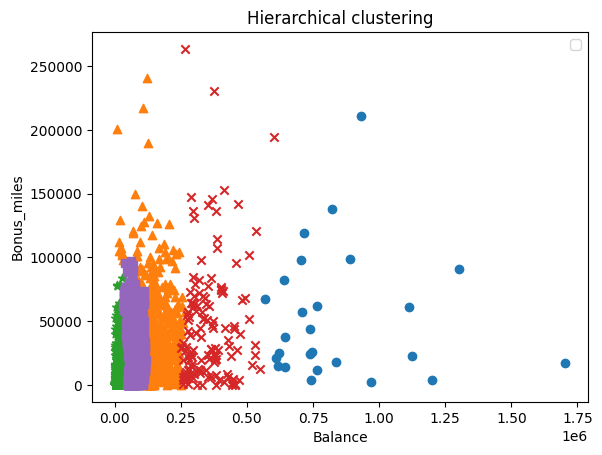

In [50]:
markers = ['o','^','*','x','s']
for cluster in range(5):
    plt.scatter(
        df['Balance'][cluster_info.labels_ == cluster],
        df['Bonus_miles'][cluster_info.labels_ == cluster],
        marker = markers[cluster]
    )
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.title('Hierarchical clustering')
plt.legend()


# DBscan

In [53]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan = cluster_info.fit(df)

In [54]:
np.unique(dbscan.labels_)

array([0, 1, 2, 3, 4])

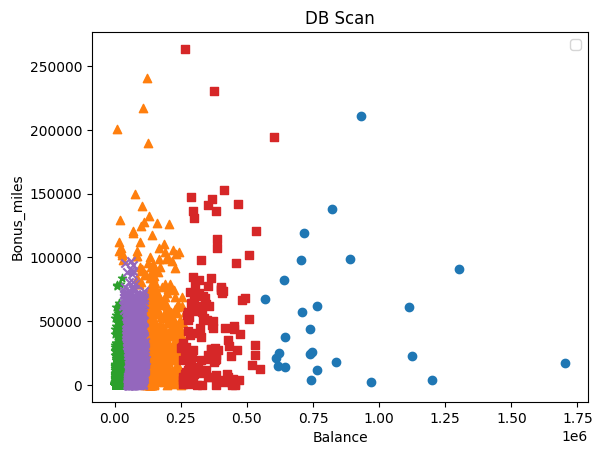

In [56]:
markers = ['o','^','*','s','x']
for cluster in range(5):
    plt.scatter(
        df['Balance'][dbscan.labels_ == cluster],
        df['Bonus_miles'][dbscan.labels_ == cluster],
        marker = markers[cluster]
    )
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.title('DB Scan')
plt.legend()

In [ ]:
df_new = pd.read_csv("EastWest .csv")

In [68]:
df_new['class'] = dbscan.labels_

In [69]:
df_new.head(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,class
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2


In [71]:
x  = df_new.drop('class',axis = 1)
y = df_new['class']

### Splitting the data

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=123456)

In [73]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

### model evaluation

In [76]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')
print(f"Accuracy: {accuracy:.2f}, precision: {precision:.2f}, recall: {recall:.2f}, f1: {f1:.2f}")

Accuracy: 0.99, precision: 0.99, recall: 0.99, f1: 0.99
